In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import plotly.express as px
from wordcloud import WordCloud
from collections import Counter
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#한글폰트 깔기
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
#한글 폰트 불러오기
import matplotlib.pyplot as plt
matplotlib.rcParams.update({'font.size': 15})
plt.rc('font', family='NanumBarunGothic')

In [ ]:
train = pd.read_csv('/content/drive/MyDrive/nh/stk_hld_train.csv')
train.head()

,act_id,iem_cd,byn_dt,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,20201112,22
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,20180905,324


In [ ]:
test = pd.read_csv('/content/drive/MyDrive/nh/stk_hld_test.csv')
test.head()

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0


In [ ]:
import pandas as pd
pd.set_option("display.max_row", 100)
pd.set_option("display.max_column", 100)
import numpy as np
import os

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
from lightgbm import LGBMRegressor

In [ ]:
cus = pd.read_csv("/content/drive/MyDrive/nh/cus_info.csv")
iem = pd.read_csv("/content/drive/MyDrive/nh/iem_info_20210902.csv")
hist = pd.read_csv("/content/drive/MyDrive/nh/stk_bnc_hist.csv")
train = pd.read_csv("/content/drive/MyDrive/nh/stk_hld_train.csv")
test = pd.read_csv("/content/drive/MyDrive/nh/stk_hld_test.csv")

submission = pd.read_csv("/content/drive/MyDrive/nh/sample_submission.csv")

In [ ]:
cus_info_df = pd.read_csv("/content/drive/MyDrive/nh/cus_info.csv")

In [ ]:
#성별 열 바꾸기.
cus_info_df.loc[cus_info_df.sex_dit_cd==1,'sex_dit_cd']='남자'
cus_info_df.loc[cus_info_df.sex_dit_cd==2,'sex_dit_cd']='여자'

#연령 열 바꾸기
cus_info_df.loc[cus_info_df.cus_age_stn_cd==1,'cus_age_stn_cd']='20세-25세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==2,'cus_age_stn_cd']='25세-30세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==3,'cus_age_stn_cd']='30세-35세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==4,'cus_age_stn_cd']='35세-40세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==5,'cus_age_stn_cd']='40세-45세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==6,'cus_age_stn_cd']='45세-50세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==7,'cus_age_stn_cd']='50세-55세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==8,'cus_age_stn_cd']='55세-60세미만'
cus_info_df.loc[cus_info_df.cus_age_stn_cd==9,'cus_age_stn_cd']='60세-25세미만'

#투자성형
cus_info_df.loc[cus_info_df.ivs_icn_cd==1,'ivs_icn_cd']='안정형'
cus_info_df.loc[cus_info_df.ivs_icn_cd==2,'ivs_icn_cd']='안정추구형'
cus_info_df.loc[cus_info_df.ivs_icn_cd==3,'ivs_icn_cd']='위험중립형'
cus_info_df.loc[cus_info_df.ivs_icn_cd==4,'ivs_icn_cd']='적극투자형'
cus_info_df.loc[cus_info_df.ivs_icn_cd==5,'ivs_icn_cd']='공격투자형'
cus_info_df.loc[cus_info_df.ivs_icn_cd==9,'ivs_icn_cd']='전문투자가형'
cus_info_df.loc[cus_info_df.ivs_icn_cd==0,'ivs_icn_cd']='정보제공미동의'
cus_info_df.loc[cus_info_df.ivs_icn_cd==99,'ivs_icn_cd']='미정의'

#고객자산구간
cus_info_df.loc[cus_info_df.cus_aet_stn_cd==1,'cus_aet_stn_cd']='0원이상-1천만원미만'
cus_info_df.loc[cus_info_df.cus_aet_stn_cd==2,'cus_aet_stn_cd']='1천만원이상-3천만원미만'
cus_info_df.loc[cus_info_df.cus_aet_stn_cd==3,'cus_aet_stn_cd']='3천만원이상-5천만원미만'
cus_info_df.loc[cus_info_df.cus_aet_stn_cd==4,'cus_aet_stn_cd']='5천만원이상-1억원미만'
cus_info_df.loc[cus_info_df.cus_aet_stn_cd==5,'cus_aet_stn_cd']='1억원이상-3억원미만'
cus_info_df.loc[cus_info_df.cus_aet_stn_cd==6,'cus_aet_stn_cd']='3억원이상'

#주거래상품군
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==1,'mrz_pdt_tp_sgm_cd']='only CMA'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==2,'mrz_pdt_tp_sgm_cd']='국내주식'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==3,'mrz_pdt_tp_sgm_cd']='해외주식'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==4,'mrz_pdt_tp_sgm_cd']='선물옵션'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==5,'mrz_pdt_tp_sgm_cd']='금속'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==6,'mrz_pdt_tp_sgm_cd']='국내채권'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==7,'mrz_pdt_tp_sgm_cd']='해외채권'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==8,'mrz_pdt_tp_sgm_cd']='펀드'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==9,'mrz_pdt_tp_sgm_cd']='ELS/DLS'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==10,'mrz_pdt_tp_sgm_cd']='신탁_퇴직연금'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==11,'mrz_pdt_tp_sgm_cd']='RP'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==12,'mrz_pdt_tp_sgm_cd']='발행어음'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==14,'mrz_pdt_tp_sgm_cd']='WRAP'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==15,'mrz_pdt_tp_sgm_cd']='신용대출'
cus_info_df.loc[cus_info_df.mrz_pdt_tp_sgm_cd==99,'mrz_pdt_tp_sgm_cd']='미정의'

#LIFESTAGE
cus_info_df.loc[cus_info_df.lsg_sgm_cd==2,'lsg_sgm_cd']='사회초년생(20-29)'
cus_info_df.loc[cus_info_df.lsg_sgm_cd==3,'lsg_sgm_cd']='가족형성기_남자(30-39&남자)'
cus_info_df.loc[cus_info_df.lsg_sgm_cd==4,'lsg_sgm_cd']='가족형성기_여자(30-39&여자)'
cus_info_df.loc[cus_info_df.lsg_sgm_cd==5,'lsg_sgm_cd']='가족성숙기_직장인(40-59&직장인&남자)'
cus_info_df.loc[cus_info_df.lsg_sgm_cd==6,'lsg_sgm_cd']='가족성숙기_주부(40-59&주부&여자)'
cus_info_df.loc[cus_info_df.lsg_sgm_cd==7,'lsg_sgm_cd']='가족성숙기_남자(40-59&기타&남자)'
cus_info_df.loc[cus_info_df.lsg_sgm_cd==8,'lsg_sgm_cd']='가족성숙기_여자(40-59&기타&여자)'
cus_info_df.loc[cus_info_df.lsg_sgm_cd==9,'lsg_sgm_cd']='은퇴기(60-69)'

cus_info_df.loc[cus_info_df.tco_cus_grd_cd==1,'tco_cus_grd_cd']='1탑클래스'
cus_info_df.loc[cus_info_df.tco_cus_grd_cd==2,'tco_cus_grd_cd']='2골드'
cus_info_df.loc[cus_info_df.tco_cus_grd_cd==3,'tco_cus_grd_cd']='3로얄'
cus_info_df.loc[cus_info_df.tco_cus_grd_cd==4,'tco_cus_grd_cd']='4그린'
cus_info_df.loc[cus_info_df.tco_cus_grd_cd==5,'tco_cus_grd_cd']='5블루'
cus_info_df.loc[cus_info_df.tco_cus_grd_cd==9,'tco_cus_grd_cd']='등급 미정의'
cus_info_df.loc[cus_info_df.tco_cus_grd_cd==99,'tco_cus_grd_cd']='미정의'

cus_info_df.loc[cus_info_df.tot_ivs_te_sgm_cd==1,'tot_ivs_te_sgm_cd']='6개월 미만'
cus_info_df.loc[cus_info_df.tot_ivs_te_sgm_cd==2,'tot_ivs_te_sgm_cd']='6개월-1년'
cus_info_df.loc[cus_info_df.tot_ivs_te_sgm_cd==3,'tot_ivs_te_sgm_cd']='1-3년'
cus_info_df.loc[cus_info_df.tot_ivs_te_sgm_cd==4,'tot_ivs_te_sgm_cd']='3-5년'
cus_info_df.loc[cus_info_df.tot_ivs_te_sgm_cd==5,'tot_ivs_te_sgm_cd']='5-10년'
cus_info_df.loc[cus_info_df.tot_ivs_te_sgm_cd==6,'tot_ivs_te_sgm_cd']='10년 이상'

cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==1,'mrz_btp_dit_cd']='건설업'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==2,'mrz_btp_dit_cd']='금융업'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==3,'mrz_btp_dit_cd']='기계'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==4,'mrz_btp_dit_cd']='방송/통신'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==5,'mrz_btp_dit_cd']='서비스/오락/문화'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==6,'mrz_btp_dit_cd']='운송/운수'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==7,'mrz_btp_dit_cd']='유통'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==8,'mrz_btp_dit_cd']='의료/의약'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==9,'mrz_btp_dit_cd']='전기/전자'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==10,'mrz_btp_dit_cd']='제조'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==11,'mrz_btp_dit_cd']='철강'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==12,'mrz_btp_dit_cd']='화학'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==13,'mrz_btp_dit_cd']='IT'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==14,'mrz_btp_dit_cd']='기타'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==15,'mrz_btp_dit_cd']='혼합'
cus_info_df.loc[cus_info_df.mrz_btp_dit_cd==16,'mrz_btp_dit_cd']='비매매'

In [ ]:
cus = cus_info_df

In [ ]:
train_data = pd.merge(train, cus, how = "left", on = ["act_id"])
train_data = pd.merge(train_data, iem, how = "left", on = ["iem_cd"])

test_data = pd.merge(test, cus, how = "left", on = ["act_id"])
test_data = pd.merge(test_data, iem, how = "left", on = ["iem_cd"])

In [ ]:
# train_data에서 Y값을 추출한 후 hold_d column을 지워주겠습니다.

# train_label = train_data["hold_d"]
# train_data.drop(["hold_d"], axis = 1, inplace = True)

In [ ]:
# 추가적으로 약간의 전처리를 통해 train data와 test data를 구성하겠습니다.

hist["stk_p"] = hist["tot_aet_amt"] / hist["bnc_qty"]
hist = hist.fillna(0)

train_data = pd.merge(train_data, hist, how = "left", on = ["act_id", "iem_cd"])
train_data = train_data[(train_data["byn_dt"] == train_data["bse_dt"])]
train_data.reset_index(drop = True, inplace = True)

test_data = pd.merge(test_data, hist, how = "left", on = ["act_id", "iem_cd"])
test_data = test_data[(test_data["byn_dt"] == test_data["bse_dt"])]
test_data.reset_index(drop = True, inplace = True)

# train_data = train_data.drop(["act_id", "iem_cd", "byn_dt", "bse_dt"], axis = 1)
# test_data = test_data.drop(["act_id", "iem_cd", "byn_dt", "submit_id", "hold_d", "bse_dt"], axis = 1)

# L_encoder = LabelEncoder()
# L_encoder.fit(iem["iem_krl_nm"])
# train_data["iem_krl_nm"] = L_encoder.transform(train_data["iem_krl_nm"])
# test_data["iem_krl_nm"] = L_encoder.transform(test_data["iem_krl_nm"])

In [ ]:
train_data.head()

,act_id,iem_cd,byn_dt,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bse_dt,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A006360,20180726,11,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,GS건설,1,1,1,20180726,274.0,11782000.0,5000.0,43000.0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005930,20180131,80,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,삼성전자,9,1,1,20180131,2.0,4990000.0,5000.0,2495000.0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A005070,20180517,5,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,코스모신소재,12,2,99,20180517,786.0,14619600.0,1000.0,18600.0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A003520,20201112,22,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,영진약품,8,2,1,20201112,60.0,462000.0,500.0,7700.0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A002310,20180905,324,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,아세아제지,10,3,99,20180905,183.0,8125200.0,5000.0,44400.0


In [ ]:
test_data.head()

,act_id,iem_cd,byn_dt,hist_d,submit_id,hold_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bse_dt,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A032640,20200522,153,IDX00001,0,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,LG유플러스,4,1,1,20200522,300.0,3945000.0,5000.0,13150.0
1,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A160600,20190823,335,IDX00002,0,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,이큐셀,10,3,99,20190823,198.0,2524500.0,500.0,12750.0
2,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A234340,20200611,139,IDX00003,0,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,세틀뱅크,13,2,99,20200611,138.0,4291800.0,500.0,31100.0
3,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A131760,20200120,236,IDX00004,0,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,파인텍,13,3,99,20200120,2972.0,6716720.0,500.0,2260.0
4,0ad104dbed99be0cd858aa772765ddedade554601a981b...,A293490,20201217,9,IDX00005,0,남자,60세-25세미만,위험중립형,1천만원이상-3천만원미만,국내주식,은퇴기(60-69),5블루,5-10년,의료/의약,카카오게임즈,13,1,2,20201217,10.0,464500.0,100.0,46450.0


In [ ]:
train_data = train_data[train_data['hist_d']<=50]

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).



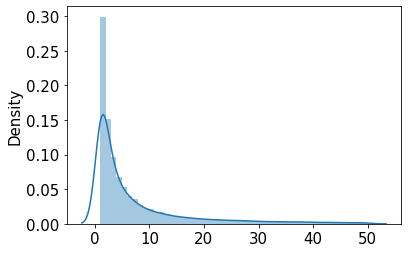

In [ ]:
import seaborn as sns
sns.distplot(x = train_data[train_data['cus_age_stn_cd'] == '60세-25세미만']['hist_d'])

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49464 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48120 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47564 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 49464 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 48120 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 47564 missing from current font.



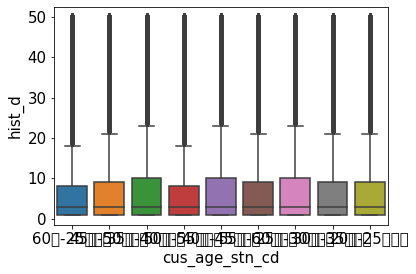

In [ ]:
sns.boxplot(x = 'cus_age_stn_cd', y = 'hist_d', data = train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50948 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54744 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51473 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47549 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 54805 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51221 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48372 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

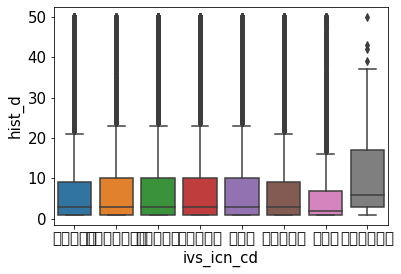

In [ ]:
sns.boxplot(x = 'ivs_icn_cd', y = 'hist_d', data = train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 52380 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47564 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50896 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49345 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48120 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50613 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

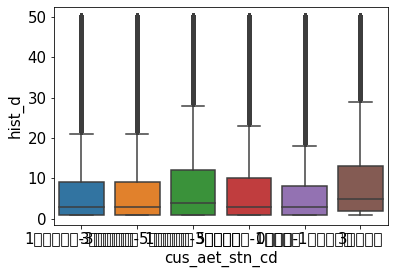

In [ ]:
sns.boxplot(x = 'cus_aet_stn_cd', y = 'hist_d', data = train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51008 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 53748 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44592 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51313 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49457 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49689 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

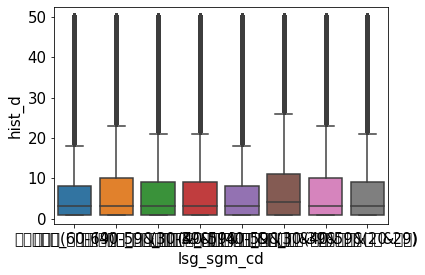

In [ ]:
sns.boxplot(x = 'lsg_sgm_cd', y = 'hist_d', data = train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51032 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47308 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50557 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51204 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44592 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51088 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48708 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

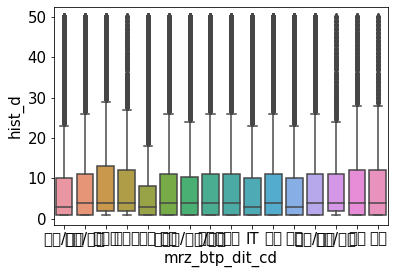

In [ ]:
sns.boxplot(x = 'mrz_btp_dit_cd', y = 'hist_d', data = train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49345 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48120 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47564 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

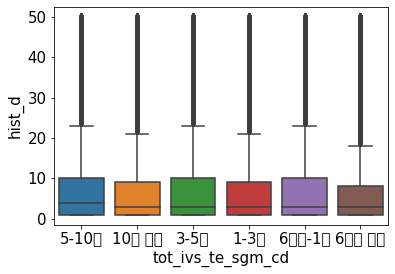

In [ ]:
sns.boxplot(x = 'tot_ivs_te_sgm_cd', y = 'hist_d', data = train_data)

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 45380 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 51060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 49345 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 44060 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 50900 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 48120 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 47564 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

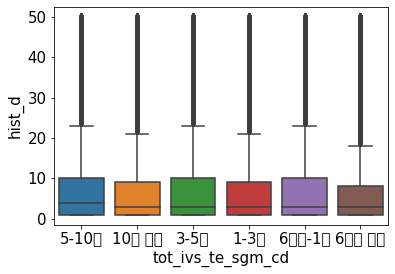

In [ ]:
sns.boxplot(x = 'tot_ivs_te_sgm_cd', y = 'hist_d', data = train_data)

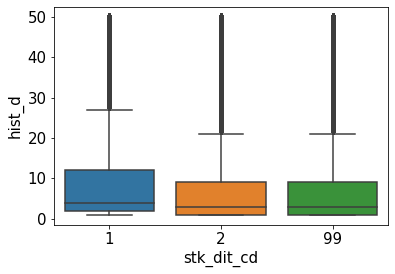

In [ ]:
sns.boxplot(x = 'stk_dit_cd', y = 'hist_d', data = train_data)

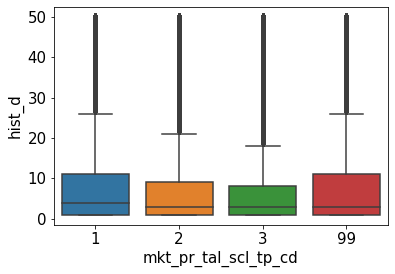

In [ ]:
sns.boxplot(x = 'mkt_pr_tal_scl_tp_cd', y = 'hist_d', data = train_data)

In [ ]:
X = pd.merge(train_data, test_data, on = ['act_id','iem_cd'])
X

,act_id,iem_cd,byn_dt_x,hold_d_x,sex_dit_cd_x,cus_age_stn_cd_x,ivs_icn_cd_x,cus_aet_stn_cd_x,mrz_pdt_tp_sgm_cd_x,lsg_sgm_cd_x,tco_cus_grd_cd_x,tot_ivs_te_sgm_cd_x,mrz_btp_dit_cd_x,iem_krl_nm_x,btp_cfc_cd_x,mkt_pr_tal_scl_tp_cd_x,stk_dit_cd_x,bse_dt_x,bnc_qty_x,tot_aet_amt_x,stk_par_pr_x,stk_p_x,byn_dt_y,hist_d,submit_id,hold_d_y,sex_dit_cd_y,cus_age_stn_cd_y,ivs_icn_cd_y,cus_aet_stn_cd_y,mrz_pdt_tp_sgm_cd_y,lsg_sgm_cd_y,tco_cus_grd_cd_y,tot_ivs_te_sgm_cd_y,mrz_btp_dit_cd_y,iem_krl_nm_y,btp_cfc_cd_y,mkt_pr_tal_scl_tp_cd_y,stk_dit_cd_y,bse_dt_y,bnc_qty_y,tot_aet_amt_y,stk_par_pr_y,stk_p_y
0,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20180330,21,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20180330,1842.0,9265260.0,5000.0,5030.0,20200707,121,IDX00011,0,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20200707,12938.0,47029630.0,5000.0,3635.0
1,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20180511,2,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20180511,2162.0,9901960.0,5000.0,4580.0,20200707,121,IDX00011,0,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20200707,12938.0,47029630.0,5000.0,3635.0
2,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20180518,9,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20180518,1868.0,9825680.0,5000.0,5260.0,20200707,121,IDX00011,0,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20200707,12938.0,47029630.0,5000.0,3635.0
3,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20180702,139,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20180702,861.0,5011020.0,5000.0,5820.0,20200707,121,IDX00011,0,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20200707,12938.0,47029630.0,5000.0,3635.0
4,356b35c423a191e1f5b8cc1dfa2d597c614ba00b52ccae...,A128820,20190424,174,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20190424,1670.0,9769500.0,5000.0,5850.0,20200707,121,IDX00011,0,남자,35세-40세미만,공격투자형,1억원이상-3억원미만,국내주식,가족형성기_남자(30-39&남자),4그린,5-10년,비매매,대성산업,7,3,99,20200707,12938.0,47029630.0,5000.0,3635.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47646,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A185750,20200917,1,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20200917,31.0,5657500.0,2500.0,182500.0,20201224,4,IDX70596,0,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20201224,50.0,11400000.0,2500.0,228000.0
47647,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A185750,20201124,12,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20201124,66.0,10692000.0,2500.0,162000.0,20201224,4,IDX70596,0,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20201224,50.0,11400000.0,2500.0,228000.0
47648,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A185750,20201214,1,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20201214,102.0,19023000.0,2500.0,186500.0,20201224,4,IDX70596,0,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20201224,50.0,11400000.0,2500.0,228000.0
47649,4561928f2825f6389f228088ac807a9fb4575ffdcbc47a...,A185750,20201216,1,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20201216,31.0,5704000.0,2500.0,184000.0,20201224,4,IDX70596,0,남자,35세-40세미만,적극투자형,1천만원이상-3천만원미만,국내주식,가족형성기_남자(30-39&남자),4그린,1-3년,의료/의약,종근당,8,2,1,20201224,50.0,11400000.0,2500.0,228000.0


In [ ]:
X.groupby(['act_id', 'iem_cd']).mean()

byn_dt_x  \
act_id                                             iem_cd                  
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9... A034730  2.020111e+07   
                                                   A109820  2.020112e+07   
                                                   A214390  2.020120e+07   
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c... A256630  2.020032e+07   
00315c895f53087d426c8e67d547e2d9a00c299f8ce84a7... A086450  2.020076e+07   
...                                                                  ...   
ffdccfb9dc24cf41843f6e7f34704ccb73ac81acc29aa39... A159910  2.019062e+07   
                                                   A195990  2.019444e+07   
                                                   A271980  2.020107e+07   
ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7bac... A118990  2.020092e+07   
fff7d563e388744fdc1ca90153ec0161d1345511cb9070f... A002630  2.020082e+07   

                                                            hold_d_x  \
act_id                                             iem_cd              
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9... A034730      4.00   
                                                   A109820      1.00   
                                                   A214390     13.00   
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c... A256630      9.00   
00315c895f53087d426c8e67d547e2d9a00c299f8ce84a7... A086450     38.00   
...                                                              ...   
ffdccfb9dc24cf41843f6e7f34704ccb73ac81acc29aa39... A159910     58.00   
                                                   A195990     25.00   
                                                   A271980      3.75   
ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7bac... A118990     27.00   
fff7d563e388744fdc1ca90153ec0161d1345511cb9070f... A002630     35.00   

                                                            btp_cfc_cd_x  \
act_id                                             iem_cd                  
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9... A034730           2.0   
                                                   A109820           5.0   
                                                   A214390           8.0   
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c... A256630          10.0   
00315c895f53087d426c8e67d547e2d9a00c299f8ce84a7... A086450          10.0   
...                                                                  ...   
ffdccfb9dc24cf41843f6e7f34704ccb73ac81acc29aa39... A159910          13.0   
                                                   A195990          10.0   
                                                   A271980           8.0   
ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7bac... A118990          10.0   
fff7d563e388744fdc1ca90153ec0161d1345511cb9070f... A002630           8.0   

                                                            mkt_pr_tal_scl_tp_cd_x  \
act_id                                             iem_cd                            
0007f3d10282e6f9de1eb445a64eb1f13e9ed2308cfbfa9... A034730                     1.0   
                                                   A109820                     2.0   
                                                   A214390                     3.0   
0008d1bfac569bdb998897e2eb8519dec06b9277a686f4c... A256630                     3.0   
00315c895f53087d426c8e67d547e2d9a00c299f8ce84a7... A086450                     1.0   
...                                                                            ...   
ffdccfb9dc24cf41843f6e7f34704ccb73ac81acc29aa39... A159910                     3.0   
                                                   A195990                     2.0   
                                                   A271980                     2.0   
ffecc8e2823943ef1a7b0d9c6512f716a88032a1bdf7bac... A118990                     2.0   
fff7d563e388744fdc1ca90153ec0161d1345511cb9070f... A002630                     3.0   

                              

In [ ]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(train_data):
    
    train_x = train_data.iloc[train_idx, :]
    train_y = train_label[train_idx]
    val_x = train_data.iloc[val_idx, :]
    val_y = train_label[val_idx]
    
    model = LGBMRegressor(objective= "regression",
                          max_depth= 5,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds.
[500]	valid_0's rmse: 4.22398	valid_0's l2: 17.842
[1000]	valid_0's rmse: 4.07726	valid_0's l2: 16.624
[1500]	valid_0's rmse: 4.04283	valid_0's l2: 16.3445
[2000]	valid_0's rmse: 4.01963	valid_0's l2: 16.1574
Did not meet early stopping. Best iteration is:
[1998]	valid_0's rmse: 4.01939	valid_0's l2: 16.1555
Training until validation scores don't improve for 300 rounds.
[500]	valid_0's rmse: 1.29387	valid_0's l2: 1.67409
[1000]	valid_0's rmse: 1.29113	valid_0's l2: 1.66703
Early stopping, best iteration is:
[733]	valid_0's rmse: 1.18197	valid_0's l2: 1.39706
Training until validation scores don't improve for 300 rounds.
[500]	valid_0's rmse: 0.682073	valid_0's l2: 0.465223
[1000]	valid_0's rmse: 0.480327	valid_0's l2: 0.230714
Early stopping, best iteration is:
[764]	valid_0's rmse: 0.478875	valid_0's l2: 0.229322
Training until validation scores don't improve for 300 rounds.
[500]	valid_0's rmse: 0.574113	valid_0's l2: 0.3

In [ ]:
result = []
for i in models:
    result.append(i.predict(test_data))
predict = np.mean(result, axis = 0)

In [ ]:
predict

array([254.86217177, 557.6633586 , 232.32522676, ..., 876.32289663,
        18.99816083,   7.46477122])

In [ ]:
submission["hold_d"] = np.round(predict)

In [ ]:
submission.to_csv("/content/drive/MyDrive/nh/dacon_baseline.csv", index = False)

In [ ]:
train_data.head()

,hist_d,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,6.0,1,9,3,2,2,9,5,5,8,101,1,1,1,274.0,11782000.0,5000.0,43000.0
1,48.0,1,9,3,2,2,9,5,5,8,1361,9,1,1,2.0,4990000.0,5000.0,2495000.0
2,3.0,1,9,3,2,2,9,5,5,8,2530,12,2,99,786.0,14619600.0,1000.0,18600.0
3,13.0,1,9,3,2,2,9,5,5,8,1969,8,2,1,60.0,462000.0,500.0,7700.0
4,194.0,1,9,3,2,2,9,5,5,8,1696,10,3,99,183.0,8125200.0,5000.0,44400.0


In [ ]:
import lightgbm as lgb

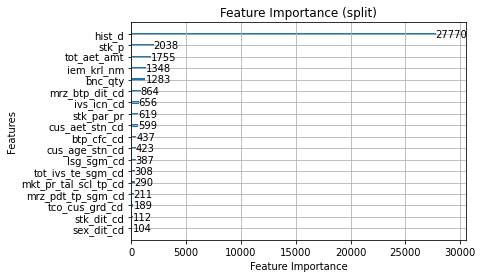

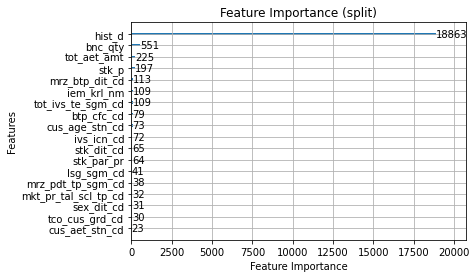

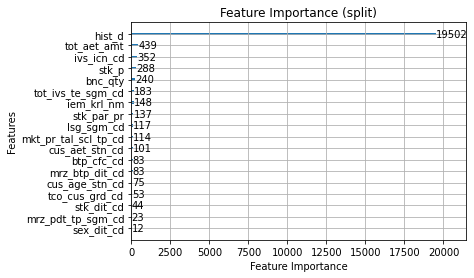

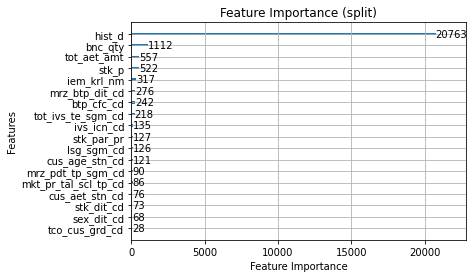

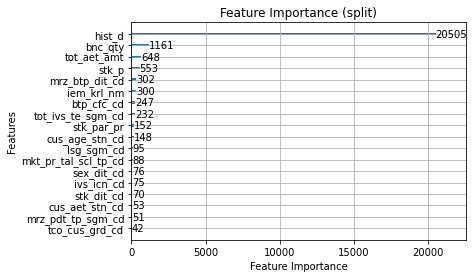

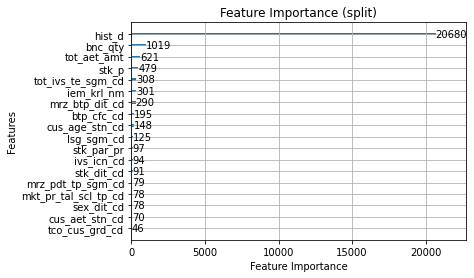

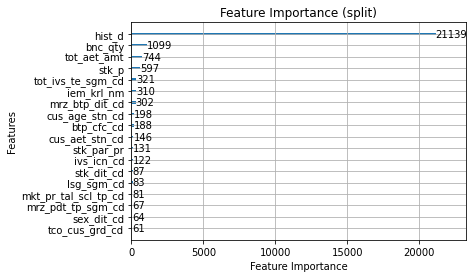

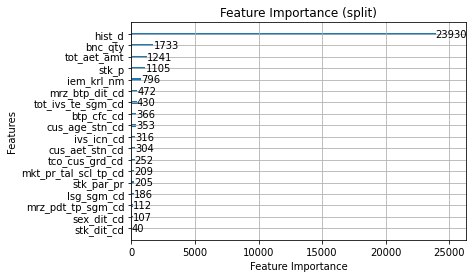

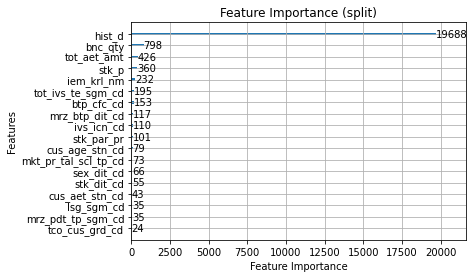

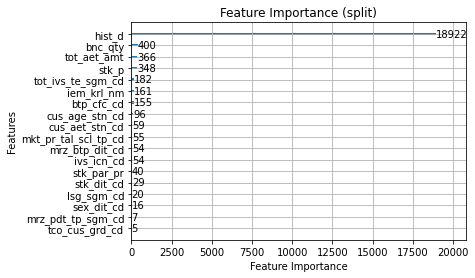

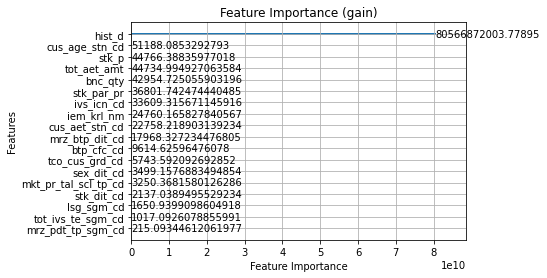

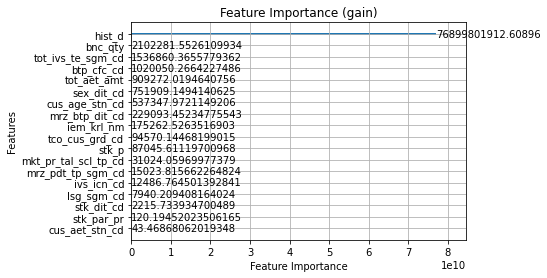

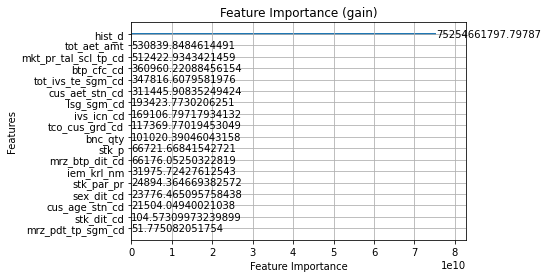

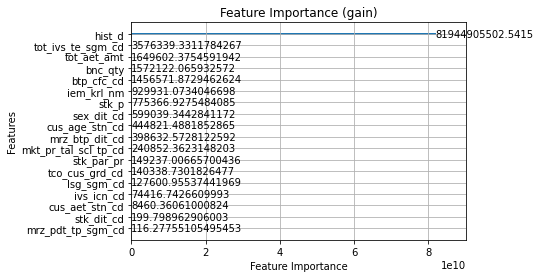

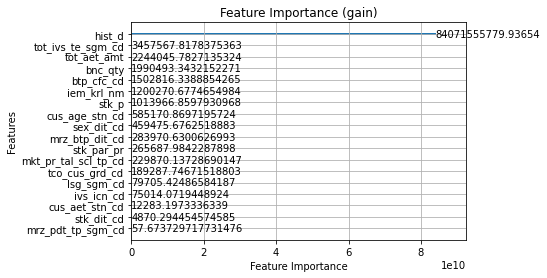

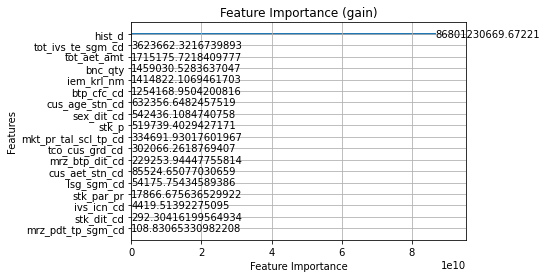

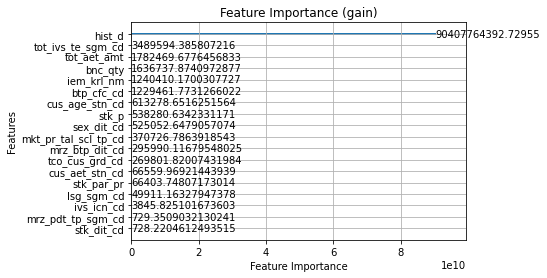

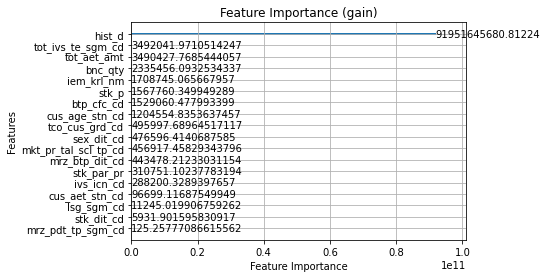

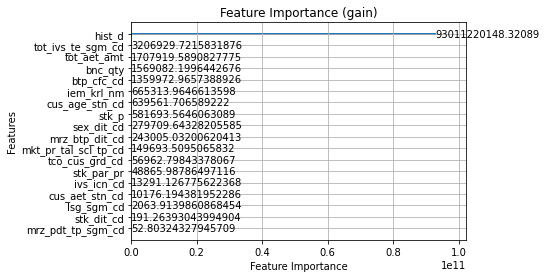

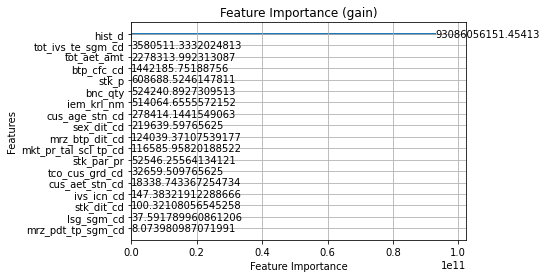

In [ ]:
# SPLIT
for i in range(len(models)):
  ax = lgb.plot_importance(models[i], max_num_features=len(list(train_data.columns)), importance_type='split')
  ax.set(title=f'Feature Importance (split)',
    xlabel='Feature Importance',
    ylabel='Features')
  # ax.figure.savefig('/content/drive/MyDrive/nh/fi_split_{}.png'.format(i), dpi=300)


# GAIN
for i in range(len(models)):
  ax = lgb.plot_importance(models[i], max_num_features=len(list(train_data.columns)), importance_type='gain')
  ax.set(title=f'Feature Importance (gain)',
    xlabel='Feature Importance',
    ylabel='Features')
  # ax.figure.savefig('/content/drive/MyDrive/nh/fi_gain_{}.png'.format(i), dpi=300)

In [ ]:
train_data.shape

(681472, 18)

In [ ]:
train_data.iloc[:,1:]

,sex_dit_cd,cus_age_stn_cd,ivs_icn_cd,cus_aet_stn_cd,mrz_pdt_tp_sgm_cd,lsg_sgm_cd,tco_cus_grd_cd,tot_ivs_te_sgm_cd,mrz_btp_dit_cd,iem_krl_nm,btp_cfc_cd,mkt_pr_tal_scl_tp_cd,stk_dit_cd,bnc_qty,tot_aet_amt,stk_par_pr,stk_p
0,1,9,3,2,2,9,5,5,8,101,1,1,1,274.0,11782000.0,5000.0,43000.0
1,1,9,3,2,2,9,5,5,8,1361,9,1,1,2.0,4990000.0,5000.0,2495000.0
2,1,9,3,2,2,9,5,5,8,2530,12,2,99,786.0,14619600.0,1000.0,18600.0
3,1,9,3,2,2,9,5,5,8,1969,8,2,1,60.0,462000.0,500.0,7700.0
4,1,9,3,2,2,9,5,5,8,1696,10,3,99,183.0,8125200.0,5000.0,44400.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681467,1,4,4,2,2,3,4,3,8,1752,10,3,99,199.0,3532250.0,500.0,17750.0
681468,1,4,4,2,2,3,4,3,8,2344,8,2,99,488.0,22960400.0,500.0,47050.0
681469,1,4,4,2,2,3,4,3,8,521,2,2,99,2210.0,9204650.0,500.0,4165.0
681470,1,4,4,2,2,3,4,3,8,2460,2,3,99,285.0,2721750.0,500.0,9550.0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
mMscaler = MinMaxScaler()
numeric_data = train_data.iloc[:,1:].values
mMscaler.fit(numeric_data)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [ ]:
train_data.iloc[:,1:] = mMscaler.transform(train_data.iloc[:,1:].values)
# mMscaled_data = pd.DataFrame(mMscaled_data, columns=num_columns)

In [ ]:
train_data = train_data.iloc[:,1:]

In [ ]:
models = []

folds = KFold(n_splits=10)
for train_idx, val_idx in folds.split(train_data):
    
    train_x = train_data.iloc[train_idx, :]
    train_y = train_label[train_idx]
    val_x = train_data.iloc[val_idx, :]
    val_y = train_label[val_idx]
    
    model = LGBMRegressor(objective= "regression",
                          max_depth= 5,
                          n_estimators= 2000,
                          learning_rate= 0.01,
                          num_leaves = 31)
    
    model.fit(train_x, train_y,
              eval_set=[(val_x, val_y)],
              eval_metric=["rmse"],
              early_stopping_rounds=300,
              verbose=500)
    
    models.append(model)

Training until validation scores don't improve for 300 rounds.
Early stopping, best iteration is:
[169]	valid_0's rmse: 64.2589	valid_0's l2: 4129.2
Training until validation scores don't improve for 300 rounds.
[500]	valid_0's rmse: 71.2378	valid_0's l2: 5074.83
[1000]	valid_0's rmse: 71.0669	valid_0's l2: 5050.51
[1500]	valid_0's rmse: 71.0718	valid_0's l2: 5051.19
Early stopping, best iteration is:
[1356]	valid_0's rmse: 71.0477	valid_0's l2: 5047.77
Training until validation scores don't improve for 300 rounds.
[500]	valid_0's rmse: 74.0466	valid_0's l2: 5482.9
[1000]	valid_0's rmse: 73.9	valid_0's l2: 5461.21
[1500]	valid_0's rmse: 73.8375	valid_0's l2: 5451.98
[2000]	valid_0's rmse: 73.739	valid_0's l2: 5437.44
Did not meet early stopping. Best iteration is:
[2000]	valid_0's rmse: 73.739	valid_0's l2: 5437.44
Training until validation scores don't improve for 300 rounds.
[500]	valid_0's rmse: 61.1531	valid_0's l2: 3739.7
[1000]	valid_0's rmse: 61.0249	valid_0's l2: 3724.04
[1500]

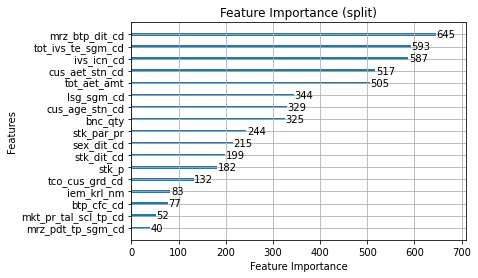

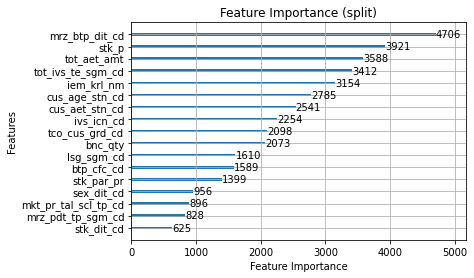

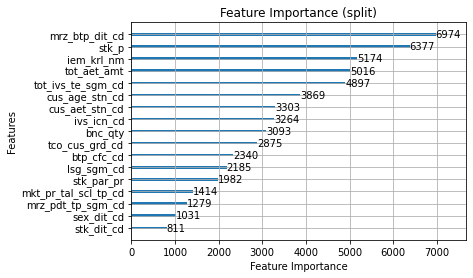

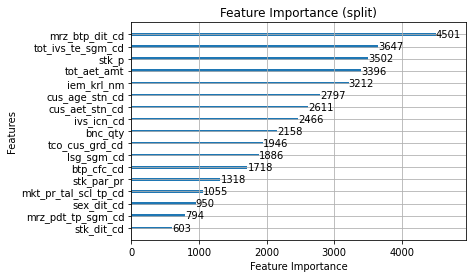

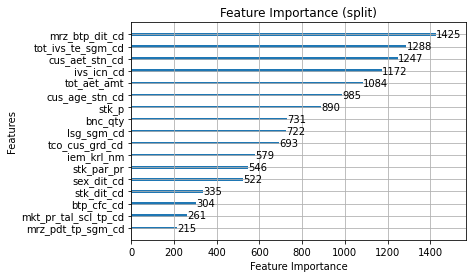

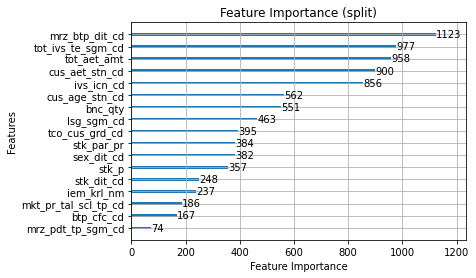

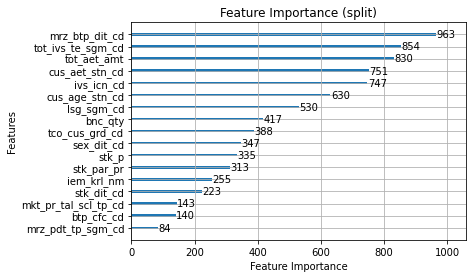

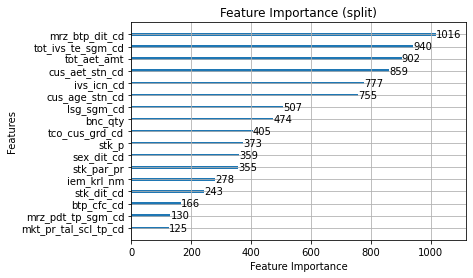

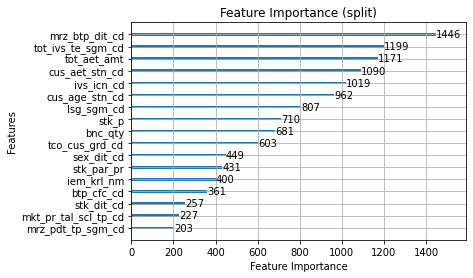

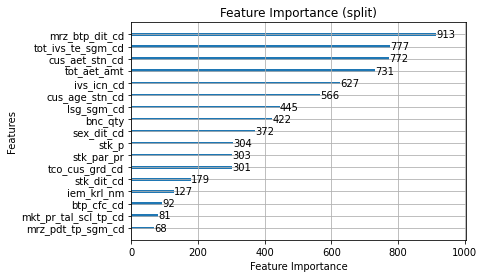

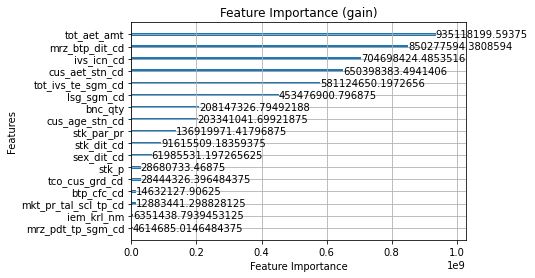

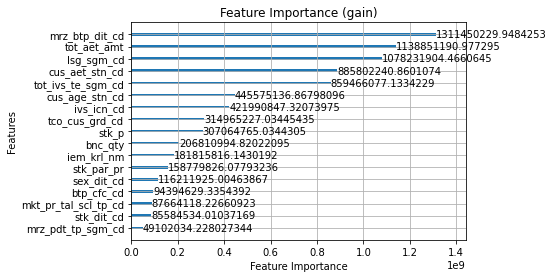

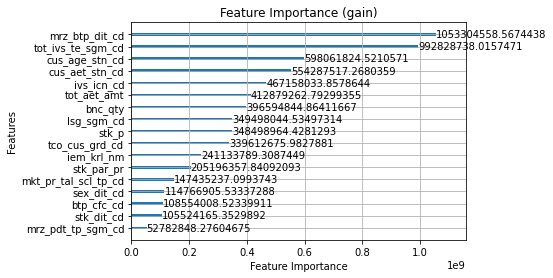

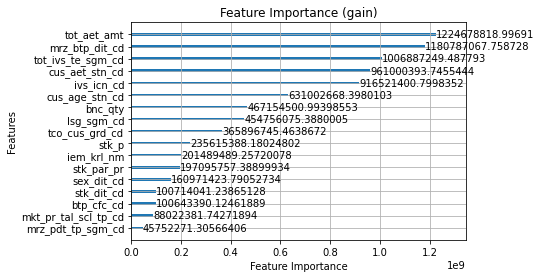

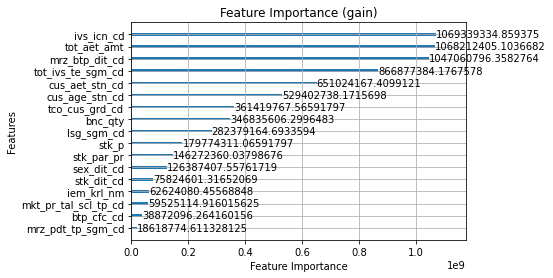

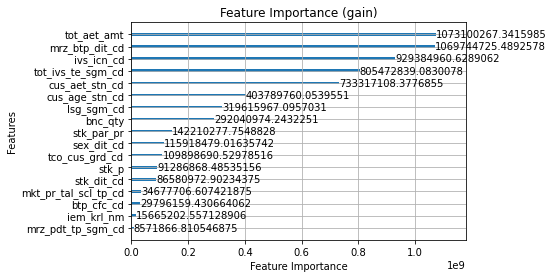

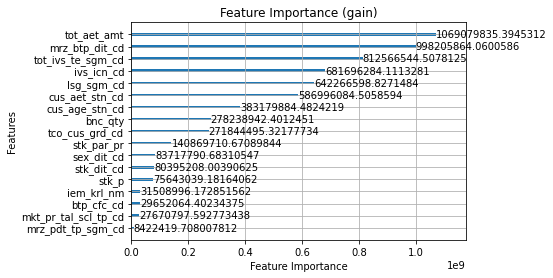

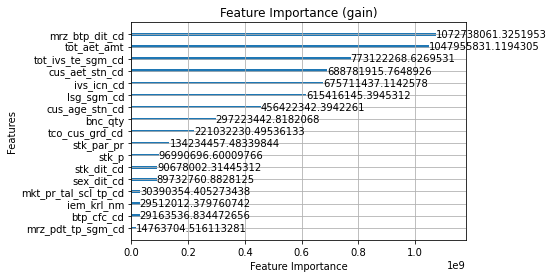

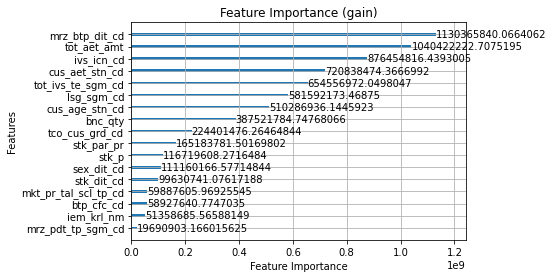

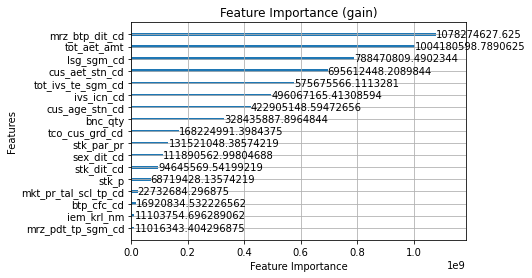

In [ ]:
# SPLIT
for i in range(len(models)):
  ax = lgb.plot_importance(models[i], max_num_features=len(list(train_data.columns)), importance_type='split')
  ax.set(title=f'Feature Importance (split)',
    xlabel='Feature Importance',
    ylabel='Features')
  # ax.figure.savefig('/content/drive/MyDrive/nh/fi_split_{}.png'.format(i), dpi=300)


# GAIN
for i in range(len(models)):
  ax = lgb.plot_importance(models[i], max_num_features=len(list(train_data.columns)), importance_type='gain')
  ax.set(title=f'Feature Importance (gain)',
    xlabel='Feature Importance',
    ylabel='Features')
  # ax.figure.savefig('/content/drive/MyDrive/nh/fi_gain_{}.png'.format(i), dpi=300)

In [ ]:
test_data = test_data.drop(["hist_d"], axis = 1)

result = []
for i in models:
    result.append(i.predict(test_data))
predict = np.mean(result, axis = 0)

In [ ]:
submission["hold_d"] = np.round(predict)
submission.to_csv("/content/drive/MyDrive/nh/dacon_baseline_except_hist.csv", index = False)